In [3]:
# 1a
def findThreeLargestNumbers(X):
    if len(X) < 3:
        return None
    x1 = 0 #can't go negative. use -inf
    x2 = 0
    x3 = 0
    
    for number in X:
        if number > x1:
            x3 = x2
            x2 = x1
            x1 = number
        elif number > x2:
            x3 = x2
            x2 = number
        elif number > x3:
            x3 = number
    
    result = [x3, x2, x1]
    print(result)
    return result
        
findThreeLargestNumbers([141, 1, 17, -7, -17, -27, 18, 541, 8, 7, 7])# -> [18, 141, 541]
findThreeLargestNumbers([11, -7, 5])# -> [-7, 5, 11]
findThreeLargestNumbers([1])# -> Null

# b
def longest_peak(X):
    if len(X) < 3:
        print(0)
        return 0
    current_peak = 0
    ascending = 0
    descending = 0
    previous = X[0]
    for number in X[1:]:
        #print("x: ", previous, "\tcurr :", current_peak, "\tasc: ", ascending, "\tdesc: ", descending)
        
        if number == previous:
            ascending = 0
            descending = 0
            
        elif number > previous:
            if descending > 0:
                current_peak = max(ascending + descending + 2, current_peak)
                ascending = 0
            ascending += 1
            
        elif number < previous:
            if ascending > 0:
                current_peak = max(ascending + descending + 2, current_peak)
                descending += 1
            
        previous = number
    
    print(current_peak)    
    return current_peak
        
longest_peak([5, 4, 3, 2, 1])# -> 0 # all decreasing
longest_peak([1, 2, 3, 4, 5])# -> 0 # all increasing
longest_peak([5, 4, 3, 2, 1, 2, 10, 12])# -> 0 # all decreasing, then all increasing
longest_peak([])# -> 0 # empty input check mandatory :D
longest_peak([1, 3, 2])# -> 3 # normal peak
longest_peak([1, 2, 3, 4, 5, 1])# -> 6 # peak ends on last number
longest_peak([2, 2, 3, 2])# -> 3 # repeat at the beginning
longest_peak([1, 2, 3, 2, 1, 1])# -> 5 # repeat at the end
longest_peak([1, 2, 3, 3, 2, 1])# -> 0 # equality at peak tip, 0 is returned
longest_peak([1, 1, 1, 2, 3, 10, 12, -3, 2, 3, 45, 800, 99, 98, 0, -1, 2, 3, 4, 5, 0, -1])# -> 9 # peak in the middle -3, 2, 3, 45, 800, 99, 98, 0, -1

[18, 141, 541]
[0, 5, 11]
0
0
0
0
3
6
3
5
0
9


9

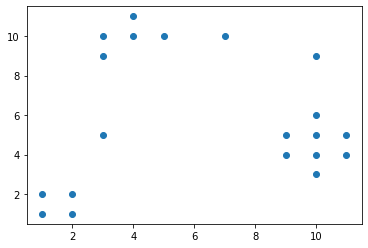

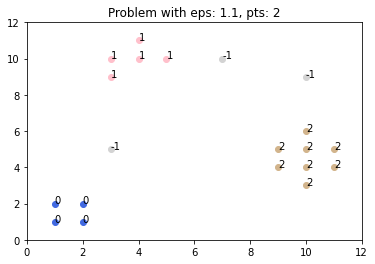

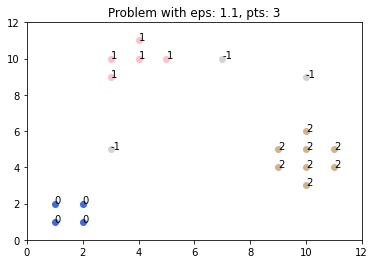

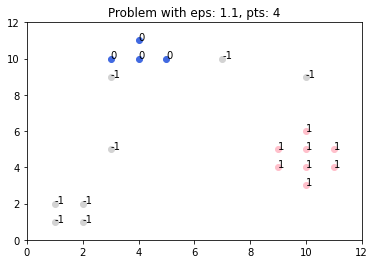

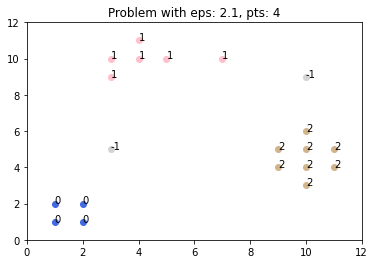

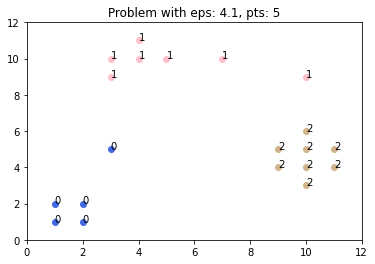

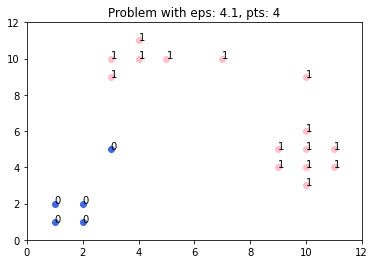

In [9]:
# 2
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

df = pd.read_csv("dbshit.csv")
plt.scatter(df["X"], df["Y"])
plt.show()
eps = [1.1, 1.1, 1.1, 2.1, 4.1, 4.1]
pts = [2, 3, 4, 4, 5, 4]
colors=["lightgrey", "royalblue", "pink", "tan"]

for i in range(len(eps)): 
    clustering = DBSCAN(eps=eps[i], min_samples=pts[i], metric="manhattan")
    labels = clustering.fit_predict(df)
    for j,label in enumerate(labels):
        plt.scatter(df["X"][j], df["Y"][j], color=colors[label+1])
        plt.annotate(label, (df["X"][j], df["Y"][j]))
    plt.title('Problem with eps: ' + str(eps[i]) + ', pts: ' + str(pts[i]))
    plt.axis((0,12,0,12))
    plt.show()

     OD_read  Proline
0       3.92   1065.0
1       3.40   1050.0
2       3.17   1185.0
3       3.45   1480.0
4       2.93    735.0
..       ...      ...
173     1.74    740.0
174     1.56    750.0
175     1.56    835.0
176     1.62    840.0
177     1.60    560.0

[178 rows x 2 columns]


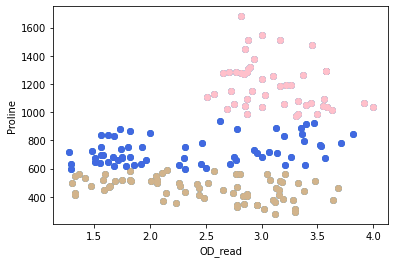

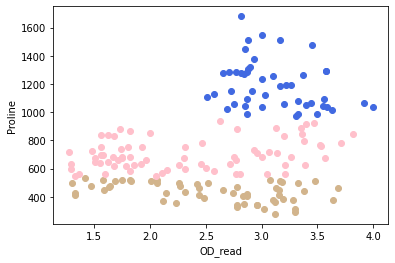

0.5739675293567901
198
[2.35000000e+03 5.73967529e-01 3.51000000e+01 5.00000000e+00
 2.00000000e+00]


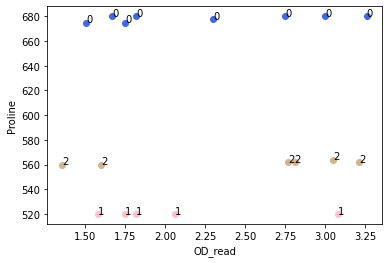

In [19]:
# 3
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

df = pd.read_csv("wine.csv")
print(df)
plt.scatter(df["OD_read"],df["Proline"])

km = KMeans(3) # three different types of wine
km.fit(df)
colors = ["royalblue", "pink", "tan"]*100
for i, label in enumerate(km.labels_):
    plt.scatter(df["OD_read"][i], df["Proline"][i], color=colors[label])
plt.xlabel("OD_read")
plt.ylabel("Proline")
plt.show()
#print("km inertia: ", km.inertia_)

agg = AgglomerativeClustering(3)
agg.fit(df)
for i, label in enumerate(agg.labels_):
    plt.scatter(df["OD_read"][i], df["Proline"][i], color=colors[label])
plt.xlabel("OD_read")
plt.ylabel("Proline")
plt.show()

eps = np.linspace(0.1, 50, 500)
eps = np.concatenate((eps, eps, eps, eps, eps, eps, eps, eps, eps, eps))
#print(eps.shape, eps)
pts = np.linspace(0.51, 10.5, 5000)
#print(pts.shape, pts)
#print("eps - pts - labels")
results = []
for i in range(len(eps)):
    db = DBSCAN(eps=eps[i], min_samples=int(round(pts[i])))
    labels = db.fit_predict(df)
    if max(labels) == 2:
        results.append((i, metrics.silhouette_score(df, labels), eps[i], round(pts[i]), max(labels)))
results = np.array(results)
print(np.max(results[:,1]))
print(np.argmax(results[:,1]))
print(results[np.argmax(results[:,1])])
    #print(eps[i], int(round(pts[i])), labels[-1], labels)
    
db = DBSCAN(eps=3.51, min_samples=5)
labels2 = db.fit_predict(df)
for j, label in enumerate(labels2):   
    if label >= 0:
        plt.scatter(df["OD_read"][j], df["Proline"][j], color=colors[label])
        plt.annotate(label, (df["OD_read"][j], df["Proline"][j]))
plt.xlabel("OD_read")
plt.ylabel("Proline")
plt.show()
